In [1]:
import pandas as pd
import numpy as np

## Visualisations
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Data Read

In [2]:
me_df = pd.read_csv('data/macro_economics.csv')
texts_df = pd.read_csv('data/labeled_texts.csv')

## Topics Data

In [3]:
print(f'Data size: {texts_df.shape[0]}x{texts_df.shape[1]}')
texts_df.head()

Data size: 96199x8


,date,title,text,url,clean_text,lemmatized_text,processed_text,topic
0,2011-03-01,"""Газпром"" выкупил право на разработку Ковыкты","Здание ""Газпрома"". Фото (c)AFP ""Газпром"" в ход...",https://lenta.ru/news/2011/03/01/kovykta/,здание газпрома фото cafp газпром ходе торгов ...,здание газпром фото cafp газпром ход торг прио...,"['bp', 'cafp', 'reuters', 'актив', 'акционер',...",3
1,2011-03-01,Курорты Северного Кавказа уравняют в налоговых...,Эльбрус. Фото с сайта elbrus-cheget.ru Туристи...,https://lenta.ru/news/2011/03/01/ksk/,эльбрус фото сайта elbruschegetru туристически...,эльбрус фото сайт elbruschegetru туристический...,"['адыгея', 'аналогичный', 'аренда', 'аркадий',...",2
2,2011-03-01,"""Ростелеком"" начал переговоры с ""МегаФоном"" о ...","Здание ""Ростелекома"". Фото с сайта tmps.ru Тел...",https://lenta.ru/news/2011/03/01/mvno/,здание ростелекома фото сайта tmpsru телекомму...,здание ростелеком фото сайт tmpsru телекоммуни...,"['lte', 'mobile', 'network', 'абонент', 'абоне...",3
3,2011-03-01,Российский банк уничтожил всю документацию пер...,"Бланк лицензии банка ""Наш банк"". Иллюстрация с...",https://lenta.ru/news/2011/03/01/erase/,бланк лицензии банка банк иллюстрация официаль...,бланк лицензия банк банк иллюстрация официальн...,"['агентство', 'агентство страхование', 'адеква...",15
4,2011-03-01,"""Уралкалий"" успел купить часть ""Сильвинита"" до...","Производство ""Уралкалия"". Фото с сайта компани...",https://lenta.ru/news/2011/03/01/buy/,производство уралкалия фото сайта компании ура...,производство уралкалий фото сайт компания урал...,"['holdings', 'limited', 'reuters', 'акционер',...",3


In [4]:
# Check for missing Values
texts_df.isnull().sum()

date               0
title              0
text               0
url                0
clean_text         0
lemmatized_text    0
processed_text     0
topic              0
dtype: int64

In [5]:
# Check for duplicates
texts_df.duplicated().sum()

0

## Topic monthly proportion calculation 

In [6]:
topics_df = texts_df[['date', 'topic', 'url']].copy()
topics_df['month-year'] = pd.to_datetime(topics_df['date']).dt.strftime('%Y-%m')

montly_counts = topics_df.groupby(by=['month-year'])['url'].count().reset_index()
montly_topic_counts = topics_df.groupby(by=['month-year', 'topic'])['url'].count().reset_index()
topic_sizes = topics_df.groupby(by=['topic'])['url'].count().reset_index()
topic_sizes.columns = ['topic', 'count']

topic_ratios = montly_counts.merge(montly_topic_counts, how='left', on=['month-year'])
topic_ratios['topic_ratio'] = topic_ratios['url_y'] / topic_ratios['url_x']
topic_ratios = topic_ratios[['month-year', 'topic', 'topic_ratio']]

topic_ratios['topic'] = 'topic_' + topic_ratios['topic'].astype(str)
topics_ts = topic_ratios.pivot(index='month-year', columns='topic', values = 'topic_ratio').reset_index()

print(f'Data size: {topics_ts.shape[0]}x{topics_ts.shape[1]}')
topics_ts.head()

Data size: 154x31


topic,month-year,topic_0,topic_1,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_2,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,2011-03,0.013514,0.011583,0.021236,0.108108,0.021236,0.032819,0.030888,0.038610,0.025097,0.005792,0.054054,0.021236,0.015444,0.036680,0.044402,0.007722,0.003861,0.034749,0.015444,0.001931,0.028958,0.052124,0.032819,0.181467,0.003861,0.075290,0.038610,0.005792,0.013514,0.023166
1,2011-04,0.028866,0.026804,0.020619,0.055670,0.014433,0.024742,0.016495,0.086598,0.018557,NaN,0.053608,0.012371,0.022680,0.047423,0.053608,NaN,0.002062,0.030928,0.016495,0.004124,0.022680,0.061856,0.022680,0.185567,0.014433,0.068041,0.049485,0.008247,0.006186,0.024742
2,2011-05,0.013575,0.018100,0.027149,0.101810,0.009050,0.022624,0.011312,0.045249,0.038462,0.002262,0.024887,0.029412,0.031674,0.047511,0.063348,0.002262,0.006787,0.020362,0.040724,0.004525,0.013575,0.049774,0.031674,0.205882,0.011312,0.063348,0.036199,0.006787,0.011312,0.009050
3,2011-06,0.024540,0.038855,0.042945,0.077710,0.008180,0.026585,0.006135,0.036810,0.038855,0.006135,0.014315,0.032720,0.032720,0.022495,0.026585,0.010225,0.006135,0.024540,0.020450,NaN,0.026585,0.063395,0.022495,0.194274,0.014315,0.108384,0.036810,0.004090,0.016360,0.016360
4,2011-07,0.021127,0.028169,0.042254,0.068075,0.025822,0.042254,0.004695,0.075117,0.039906,0.002347,0.046948,0.021127,0.021127,0.018779,0.044601,0.002347,0.009390,0.032864,0.014085,0.007042,0.009390,0.037559,0.025822,0.185446,0.009390,0.093897,0.035211,0.007042,0.004695,0.023474


### Most popular topics

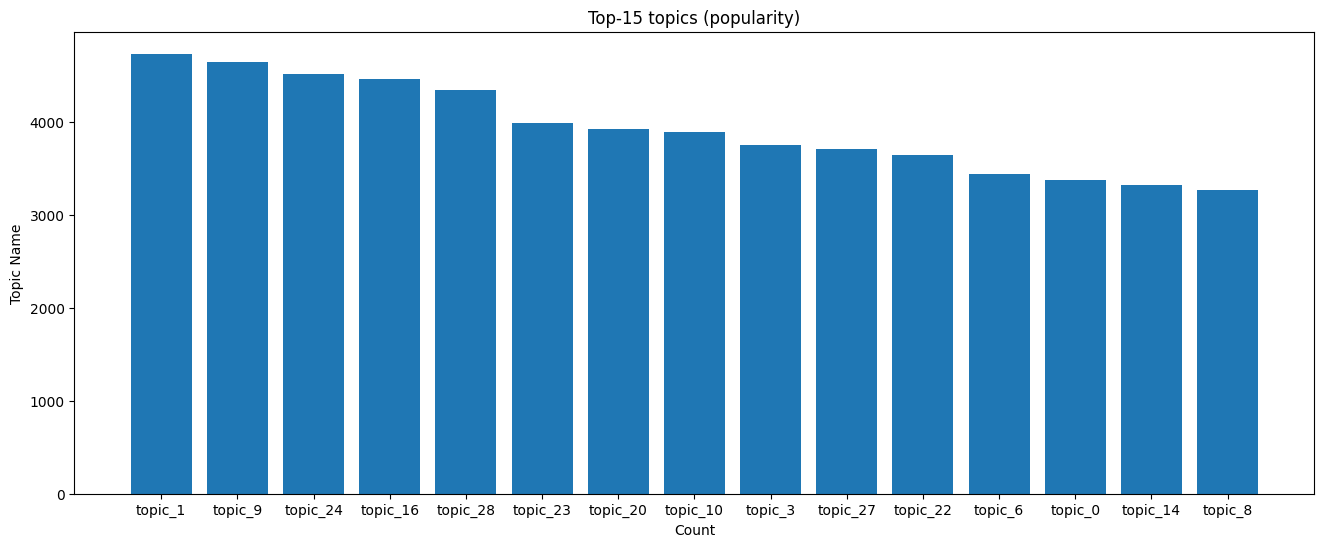

In [7]:
topic_sizes = topic_sizes.sort_values(by = ['count'], ascending=False)
topic_sizes = topic_sizes.head(15)

plt.figure(figsize=(16, 6))

plt.bar('topic_' + topic_sizes['topic'].astype(str), topic_sizes['count'])
plt.title('Top-15 topics (popularity)')
plt.xlabel('Count')
plt.ylabel('Topic Name')
plt.show()

## MacroEconomics

In [8]:
print(f'Data size: {me_df.shape[0]}x{me_df.shape[1]}')
me_df.head()

Data size: 154x20


,date,inflaton_rate,interest_rate,CPI,unemplyment_rate,GDP,fx_eur_rub,fx_usd_rub,oil_price,gas_price,gold_price,MOEX,exports,imports,external_debt,chicken_eggs_10pcs,granulated_sugar_1kg,wheat_flour_1kg,avg_monthly_salary,sanctions
0,2011-03,9.46,5.25,107.7,7.4,13024.799539,39.635183,28.416026,102.981305,4.069217,1422.617389,NaN,42955.4763,25918.2778,508361.0,39.53,43.31,21.67,22673.0,NaN
1,2011-04,9.61,5.25,108.1,7.0,13024.799539,40.283450,28.076235,110.038501,4.271650,1481.865002,NaN,45211.1719,25941.0420,508361.0,41.98,41.27,21.53,22519.0,NaN
2,2011-05,9.59,8.25,108.7,7.2,13024.799539,39.790900,27.864314,101.356667,4.336143,1511.014288,NaN,43701.5600,26940.5820,508361.0,35.11,39.65,21.34,22779.0,NaN
3,2011-06,9.42,8.25,108.9,6.4,14434.822306,40.085386,27.936823,96.288637,4.516045,1527.995456,NaN,43518.1509,26327.8458,538120.0,30.71,38.66,21.11,24137.0,NaN
4,2011-07,9.01,8.25,108.9,6.1,14434.822306,39.718085,27.854081,97.340500,4.353250,1577.125006,NaN,41487.9474,26029.1594,538120.0,31.05,39.31,21.04,23598.0,NaN


In [9]:
# Check for missing Values
me_df.isnull().sum()

date                      0
inflaton_rate             0
interest_rate             0
CPI                       0
unemplyment_rate          0
GDP                       0
fx_eur_rub                0
fx_usd_rub                0
oil_price                 0
gas_price                 0
gold_price                0
MOEX                     24
exports                   0
imports                   0
external_debt             0
chicken_eggs_10pcs        0
granulated_sugar_1kg      0
wheat_flour_1kg           0
avg_monthly_salary        0
sanctions               137
dtype: int64

In [10]:
# Check for duplicates
me_df.duplicated().sum()

0

# Preprocessing

In [11]:
# Merge of Two datasets (macroeconomics + texts)
me_df = me_df.rename(columns = {'date' : 'month-year'})
df = me_df.merge(topics_ts, how ='left', on=['month-year'])


print(f'Data size: {df.shape[0]}x{df.shape[1]}')
df.head()

Data size: 154x50


,month-year,inflaton_rate,interest_rate,CPI,unemplyment_rate,GDP,fx_eur_rub,fx_usd_rub,oil_price,gas_price,gold_price,MOEX,exports,imports,external_debt,chicken_eggs_10pcs,granulated_sugar_1kg,wheat_flour_1kg,avg_monthly_salary,sanctions,topic_0,topic_1,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_2,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,2011-03,9.46,5.25,107.7,7.4,13024.799539,39.635183,28.416026,102.981305,4.069217,1422.617389,NaN,42955.4763,25918.2778,508361.0,39.53,43.31,21.67,22673.0,NaN,0.013514,0.011583,0.021236,0.108108,0.021236,0.032819,0.030888,0.038610,0.025097,0.005792,0.054054,0.021236,0.015444,0.036680,0.044402,0.007722,0.003861,0.034749,0.015444,0.001931,0.028958,0.052124,0.032819,0.181467,0.003861,0.075290,0.038610,0.005792,0.013514,0.023166
1,2011-04,9.61,5.25,108.1,7.0,13024.799539,40.283450,28.076235,110.038501,4.271650,1481.865002,NaN,45211.1719,25941.0420,508361.0,41.98,41.27,21.53,22519.0,NaN,0.028866,0.026804,0.020619,0.055670,0.014433,0.024742,0.016495,0.086598,0.018557,NaN,0.053608,0.012371,0.022680,0.047423,0.053608,NaN,0.002062,0.030928,0.016495,0.004124,0.022680,0.061856,0.022680,0.185567,0.014433,0.068041,0.049485,0.008247,0.006186,0.024742
2,2011-05,9.59,8.25,108.7,7.2,13024.799539,39.790900,27.864314,101.356667,4.336143,1511.014288,NaN,43701.5600,26940.5820,508361.0,35.11,39.65,21.34,22779.0,NaN,0.013575,0.018100,0.027149,0.101810,0.009050,0.022624,0.011312,0.045249,0.038462,0.002262,0.024887,0.029412,0.031674,0.047511,0.063348,0.002262,0.006787,0.020362,0.040724,0.004525,0.013575,0.049774,0.031674,0.205882,0.011312,0.063348,0.036199,0.006787,0.011312,0.009050
3,2011-06,9.42,8.25,108.9,6.4,14434.822306,40.085386,27.936823,96.288637,4.516045,1527.995456,NaN,43518.1509,26327.8458,538120.0,30.71,38.66,21.11,24137.0,NaN,0.024540,0.038855,0.042945,0.077710,0.008180,0.026585,0.006135,0.036810,0.038855,0.006135,0.014315,0.032720,0.032720,0.022495,0.026585,0.010225,0.006135,0.024540,0.020450,NaN,0.026585,0.063395,0.022495,0.194274,0.014315,0.108384,0.036810,0.004090,0.016360,0.016360
4,2011-07,9.01,8.25,108.9,6.1,14434.822306,39.718085,27.854081,97.340500,4.353250,1577.125006,NaN,41487.9474,26029.1594,538120.0,31.05,39.31,21.04,23598.0,NaN,0.021127,0.028169,0.042254,0.068075,0.025822,0.042254,0.004695,0.075117,0.039906,0.002347,0.046948,0.021127,0.021127,0.018779,0.044601,0.002347,0.009390,0.032864,0.014085,0.007042,0.009390,0.037559,0.025822,0.185446,0.009390,0.093897,0.035211,0.007042,0.004695,0.023474


## Distibutions

In [12]:
df.describe()

,inflaton_rate,interest_rate,CPI,unemplyment_rate,GDP,fx_eur_rub,fx_usd_rub,oil_price,gas_price,gold_price,MOEX,exports,imports,external_debt,chicken_eggs_10pcs,granulated_sugar_1kg,wheat_flour_1kg,avg_monthly_salary,sanctions,topic_0,topic_1,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_2,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,130.000000,154.000000,154.000000,154.00000,154.000000,154.000000,154.000000,154.000000,17.0,154.000000,154.000000,154.000000,154.000000,153.000000,154.000000,153.000000,154.000000,153.000000,145.000000,154.000000,154.000000,148.000000,153.000000,148.000000,146.000000,146.000000,154.000000,154.000000,108.000000,154.000000,154.000000,153.000000,147.000000,134.000000,137.000000,154.000000,144.000000,147.000000,154.000000
mean,7.007403,8.435065,167.237013,5.109091,25152.127475,66.769730,57.697239,70.861890,3.348097,1506.064159,2323.312997,36741.473824,21824.286839,524832.74461,59.296429,46.560130,34.698442,43309.788961,1.0,0.041583,0.039544,0.037921,0.035858,0.021463,0.029166,0.034560,0.039494,0.042483,0.028737,0.032288,0.029953,0.029410,0.047080,0.022748,0.027140,0.034495,0.044448,0.023738,0.021691,0.037771,0.050804,0.025505,0.049580,0.023345,0.039669,0.036787,0.017813,0.030006,0.051609
std,3.967206,2.638764,39.563907,0.874801,8209.537493,18.554073,18.559769,22.647489,1.261002,271.561803,706.018300,7960.024516,4454.011705,95072.66602,16.410666,13.406214,9.429882,15235.834036,0.0,0.027284,0.033545,0.025848,0.035736,0.014301,0.013536,0.036219,0.038499,0.029864,0.023864,0.019424,0.030114,0.017544,0.047400,0.017302,0.028986,0.030459,0.025150,0.011676,0.019841,0.022339,0.025049,0.014948,0.062809,0.025590,0.031862,0.013980,0.014206,0.022348,0.026653
min,2.200000,4.250000,107.700000,2.900000,13024.799539,38.714177,27.854081,16.699048,1.700864,1069.945457,1316.310004,17631.079700,9104.340600,317892.70000,30.710000,29.900000,19.590000,22519.000000,1.0,0.007874,0.005298,0.003731,0.002506,0.001927,0.002558,0.002160,0.001342,0.002445,0.001587,0.002558,0.001205,0.003846,0.002331,0.002360,0.001669,0.001887,0.009732,0.002710,0.000816,0.001887,0.012996,0.003096,0.001458,0.001815,0.002445,0.003817,0.001988,0.002075,0.009050
25%,4.015000,7.250000,130.300000,4.625000,18914.708140,48.046153,35.330418,51.225646,2.622487,1266.340665,1746.378076,30574.532225,18690.635200,470717.00000,48.467500,35.920000,27.530000,32200.000000,1.0,0.024502,0.017998,0.023033,0.011649,0.011628,0.021111,0.011111,0.009171,0.023697,0.006623,0.015856,0.009129,0.016714,0.014888,0.008746,0.007306,0.007333,0.029485,0.015444,0.004425,0.020457,0.032701,0.011429,0.008075,0.005890,0.014354,0.026813,0.007675,0.013122,0.031645
50%,6.435000,8.000000,168.450000,5.200000,23079.842857,69.863560,62.671607,70.179511,2.935937,1475.426191,2227.133509,36960.626900,22327.328850,518445.00000,57.995000,43.860000,32.985000,39663.500000,1.0,0.030525,0.029331,0.032884,0.019933,0.018405,0.028759,0.021216,0.028484,0.035714,0.021505,0.030489,0.019827,0.025163,0.029070,0.017533,0.017201,0.027970,0.039601,0.022024,0.018232,0.033181,0.046150,0.024133,0.014364,0.013420,0.028135,0.035723,0.013785,0.024671,0.044563
75%,8.120000,9.500000,188.050000,5.600000,29220.584141,78.155294,70.196139,92.734681,3.840548,1756.069795,2765.744827,43753.880075,25265.210550,557056.25000,66.777500,53.435000,40.187500,51221.000000,1.0,0.049802,0.048725,0.046437,0.053484,0.026766,0.036384,0.042373,0.062573,0.052334,0.047994,0.045664,0.037023,0.039047,0.059603,0.032294,0.035189,0.053536,0.051726,0.030082,0.033208,0.052433,0.062201,0.035398,0.086413,0.030596,0.063348,0.046020,0.023553,0.044207,0.066800
max,17.830000,20.000000,249.100000,7.400000,50814.443887,132.952291,111.013403,114.339048,8.779478,2031.674994,4221.789028,57215.138100,306

## Data Types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   month-year            154 non-null    object 
 1   inflaton_rate         154 non-null    float64
 2   interest_rate         154 non-null    float64
 3   CPI                   154 non-null    float64
 4   unemplyment_rate      154 non-null    float64
 5   GDP                   154 non-null    float64
 6   fx_eur_rub            154 non-null    float64
 7   fx_usd_rub            154 non-null    float64
 8   oil_price             154 non-null    float64
 9   gas_price             154 non-null    float64
 10  gold_price            154 non-null    float64
 11  MOEX                  130 non-null    float64
 12  exports               154 non-null    float64
 13  imports               154 non-null    float64
 14  external_debt         154 non-null    float64
 15  chicken_eggs_10pcs    1

## Missing values

In [14]:
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Feature', 'N_missing_vals']
missing_values[missing_values['N_missing_vals'] > 0]

,Feature,N_missing_vals
11,MOEX,24
19,sanctions,137
24,topic_12,1
26,topic_14,1
28,topic_16,1
29,topic_17,9
32,topic_2,6
33,topic_20,1
34,topic_21,6
35,topic_22,8


**NOTE:** There are several features with missing values. On the next step you may find procedure which fixes missing values

In [15]:
for col in df.columns:
    if 'topic_' in col:
        df[col] = df[col].fillna(0)
        
df['sanctions'] = df['sanctions'].fillna(0)

df = df.drop(columns = ['MOEX'])                      # Remove MOEX 
#df['is_null_MOEX'] = df['MOEX'].isnull().astype(int)
#df['MOEX'] = df['MOEX'].fillna(0)

In [16]:
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Feature', 'N_missing_vals']
missing_values[missing_values['N_missing_vals'] > 0]

,Feature,N_missing_vals


# Data Exploration
## Distributions

In [17]:
def dist_plots(data):
    '''
    Plots distribution of all continuous features
    '''
    numeric_cols = [col for col in data.columns if (data[col].nunique() > 5)]
    sns.set()
    fig, axes = plt.subplots(2, int(np.ceil(len(numeric_cols) / 2)), figsize=(20, 11))
    for ax, feat in zip(axes.flatten(), numeric_cols):
        ax.hist(data[feat], bins = 30)
        ax.set_title(feat, y=-0.13)

    title = "Numeric Variables' Histograms"
    plt.suptitle(title)
    plt.show()

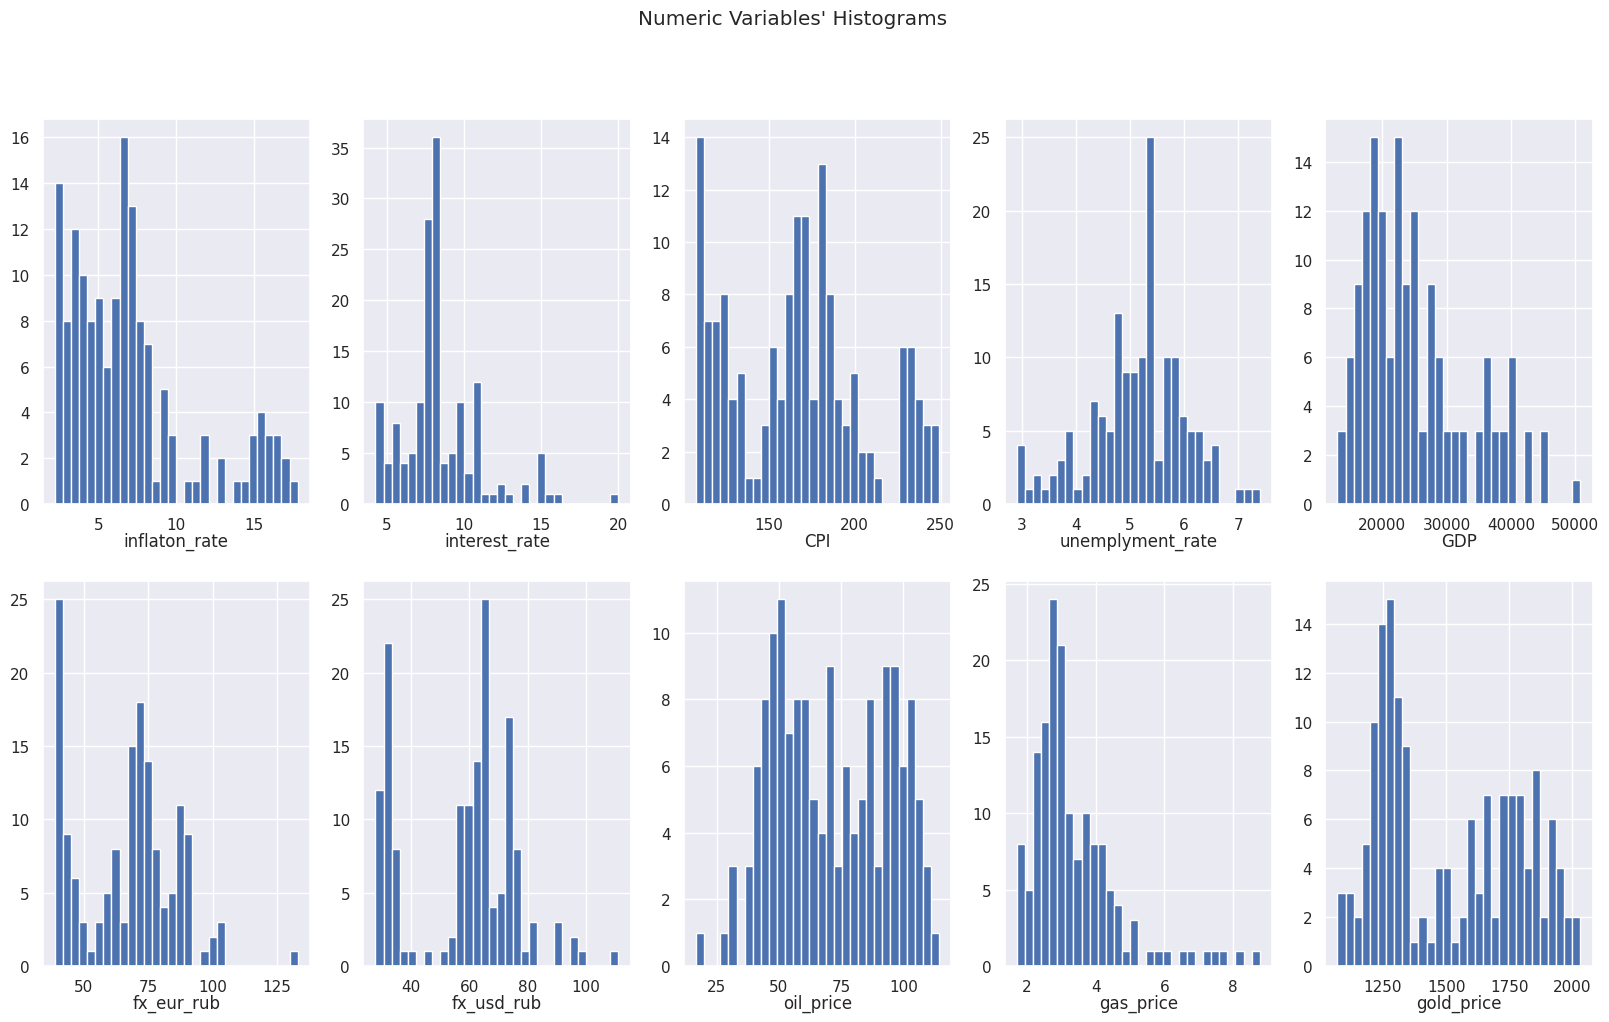

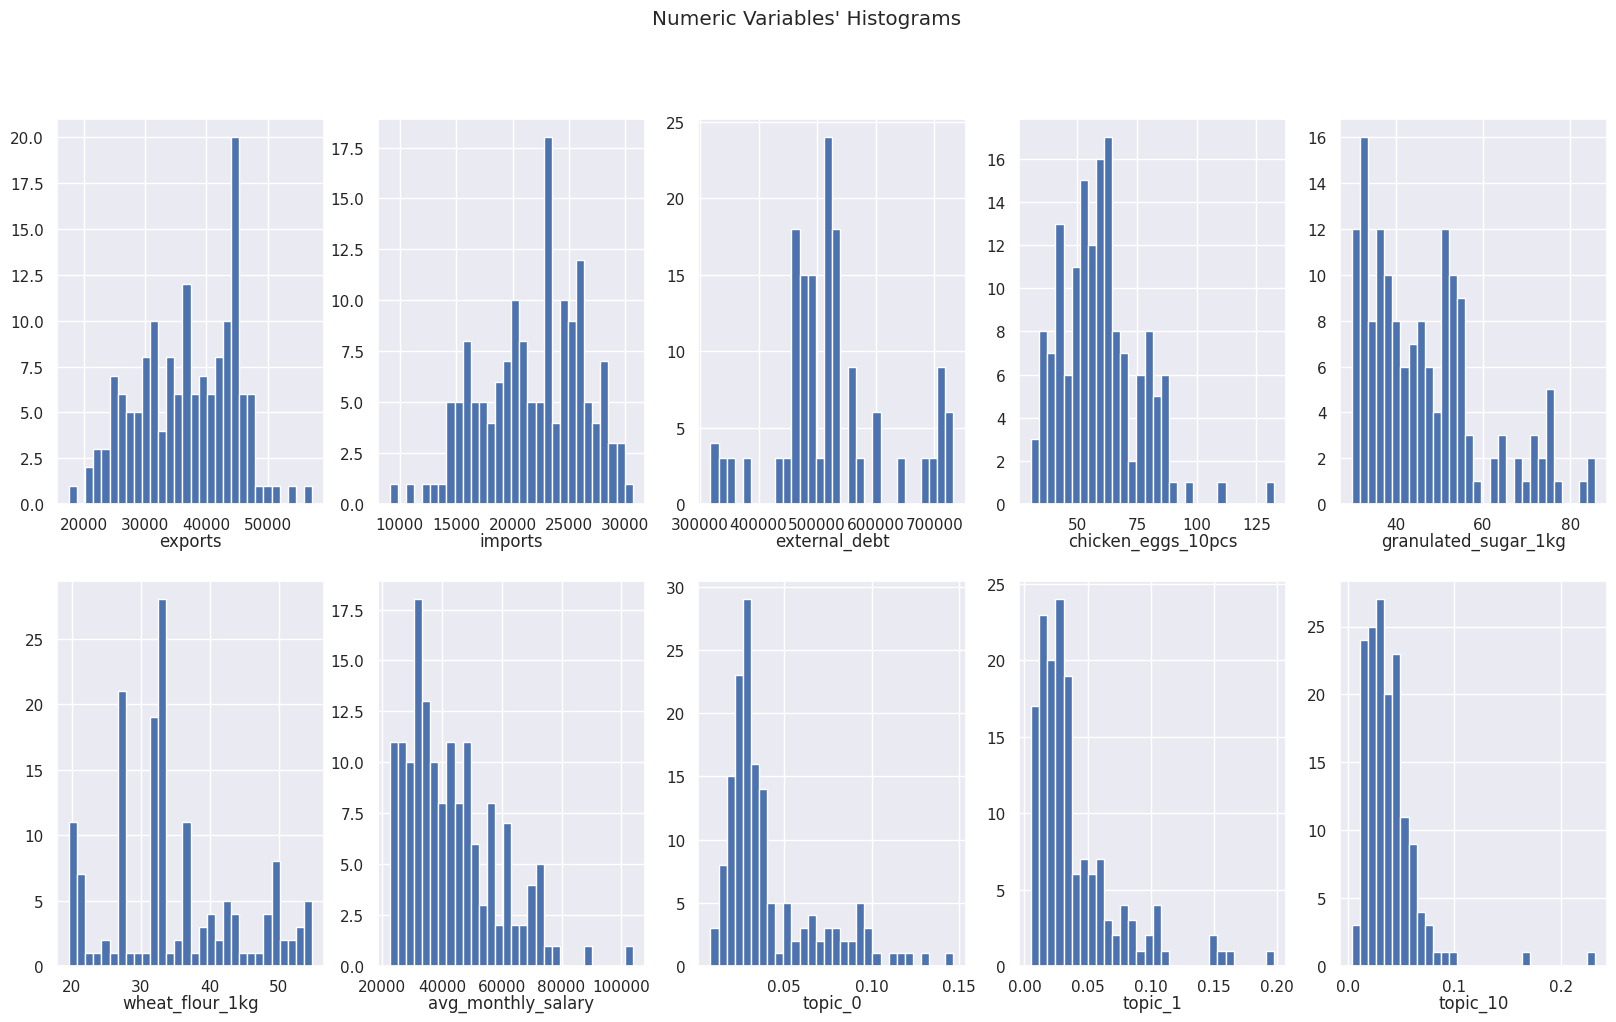

In [18]:
dist_plots(df[list(df.columns)[1:11]])
dist_plots(df[list(df.columns)[11:22]])

## TS plots

### Inflation & Interest Rate

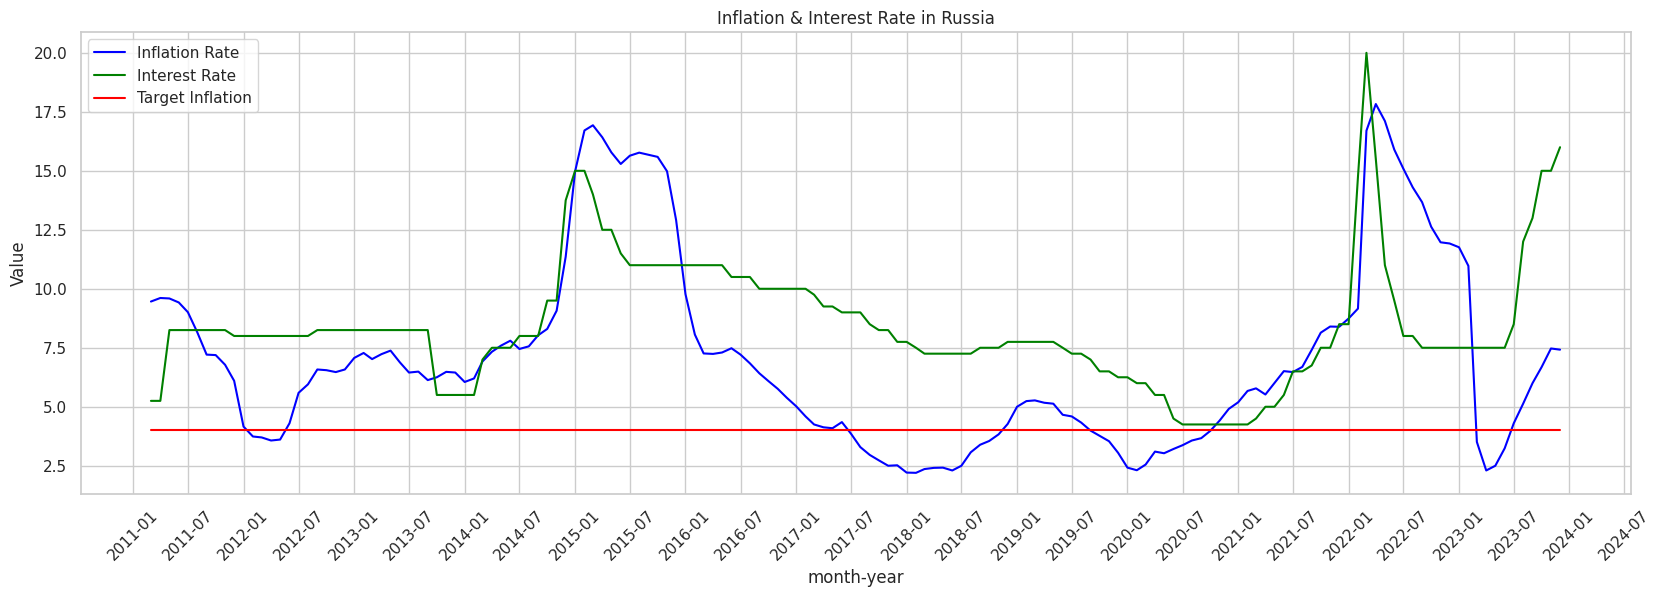

In [19]:
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(20, 6))

data = df.copy()
data['month-year'] = pd.to_datetime(data['month-year'])
data['target_inflation'] = 4

# Plot the primary y-axis data
sns.lineplot(data=data, x="month-year", y="inflaton_rate", ax=ax1, color="blue", label = 'Inflation Rate')

# Create the secondary y-axis
sns.lineplot(data=data, x="month-year", y="interest_rate", ax=ax1, color="green", label = 'Interest Rate')

# Create the secondary y-axis
sns.lineplot(data=data, x="month-year", y="target_inflation", ax=ax1, color="red", label = 'Target Inflation')

ax1.set_title('Inflation & Interest Rate in Russia')
ax1.set_ylabel('Value')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show every 2nd month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.legend(loc= "upper left")
# Show the plot
plt.show()

### Topic Ratios

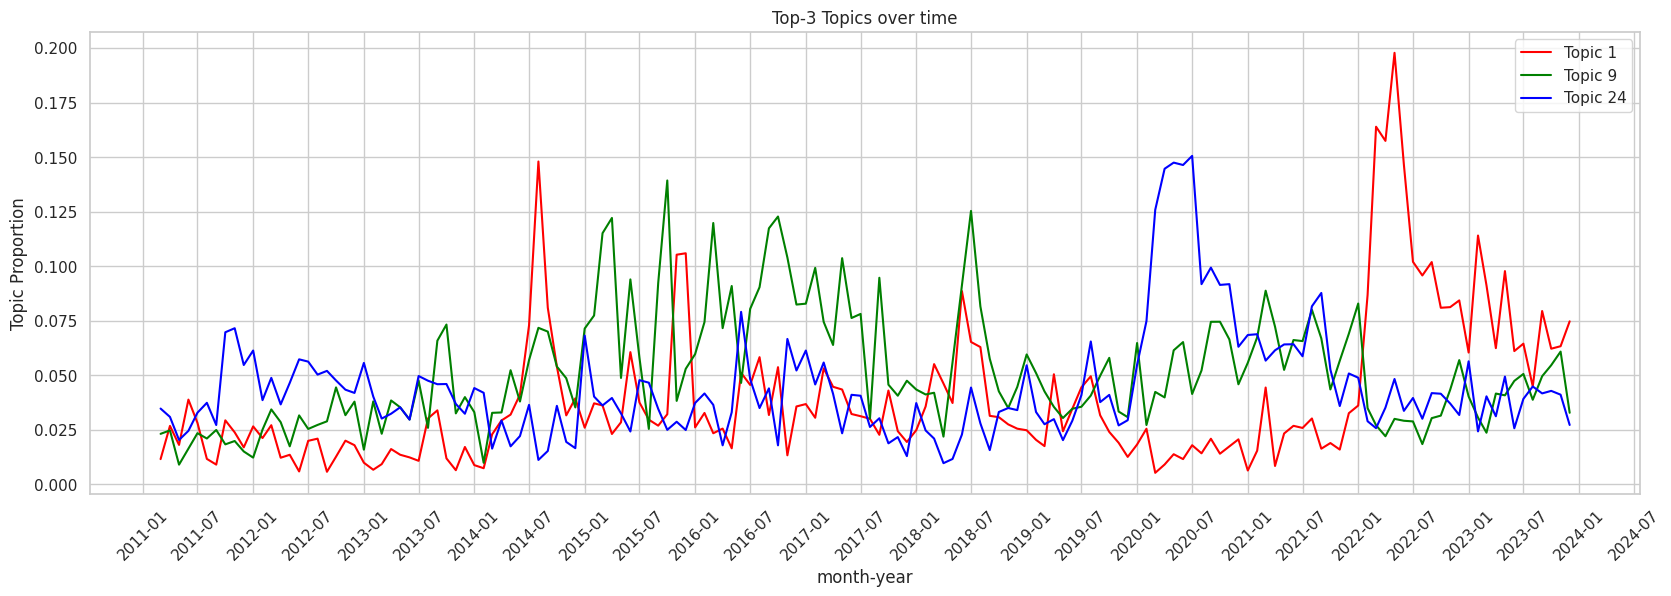

In [20]:
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(20, 6))

data = df.copy()
data['month-year'] = pd.to_datetime(data['month-year'])
# Plot the primary y-axis data
sns.lineplot(data=data, x="month-year", y="topic_1", ax=ax1, color="red", label='Topic 1')

# Create the secondary y-axis
sns.lineplot(data=data, x="month-year", y="topic_9", ax=ax1, color="green", label='Topic 9')

# Create the secondary y-axis
sns.lineplot(data=data, x="month-year", y="topic_24", ax=ax1, color="blue", label='Topic 24')

ax1.set_title('Top-3 Topics over time')
ax1.set_ylabel('Topic Proportion')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show every 2nd month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Correlations

### Macroeconomics Features

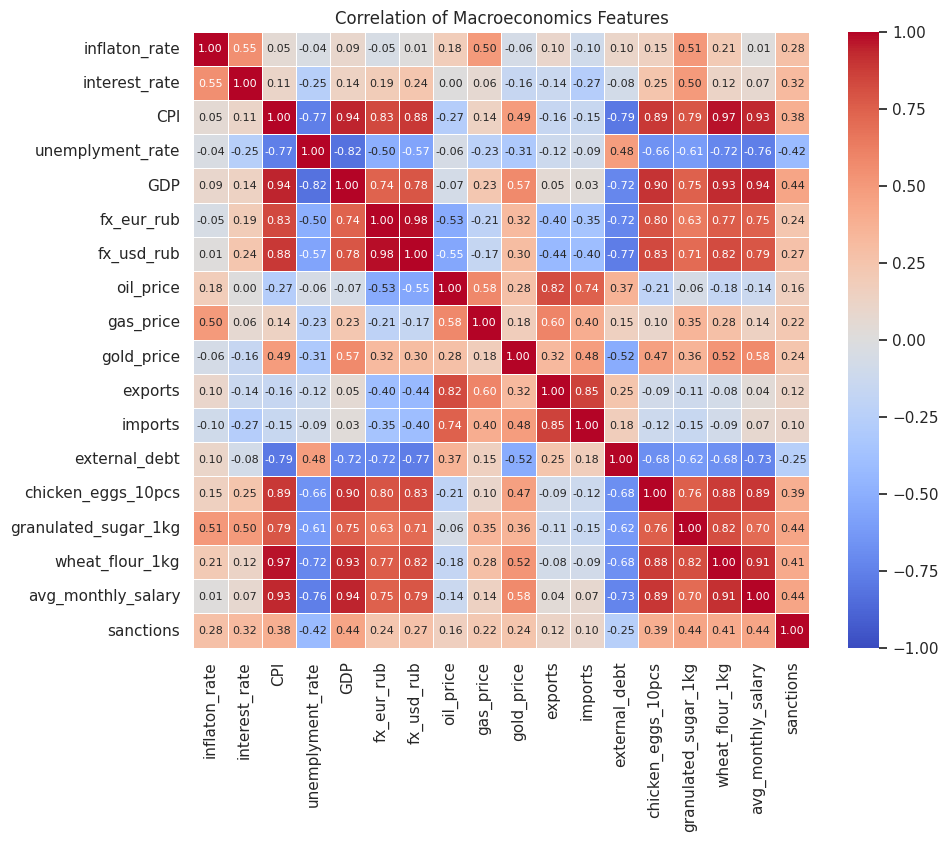

In [21]:
def heat_map(data, title):
    correlation_matrix = data.corr()
    plt.figure(figsize = (10,8))
    plt.rcParams.update({'font.size': 8})
    sns.heatmap(correlation_matrix, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
    plt.title(title)
    plt.show()

data = df.drop(columns = ['month-year']).copy()
data = data[[_ for _ in data.columns if 'topic_' not in _]]
heat_map(data, 'Correlation of Macroeconomics Features')

### Top-15 Topics Correlation

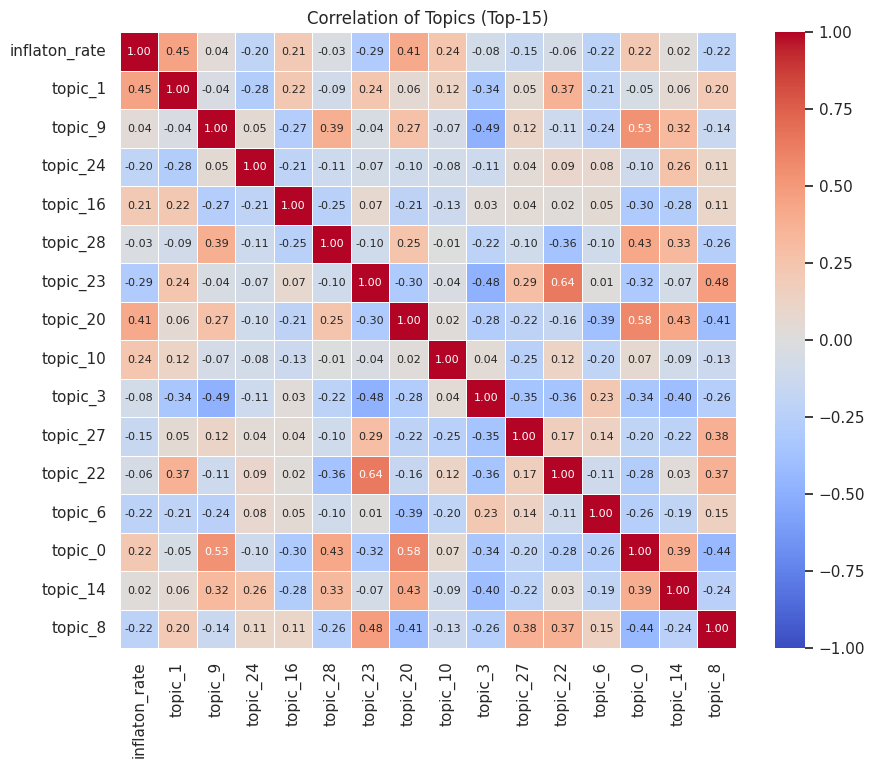

In [22]:
data = df.drop(columns = ['month-year']).copy()
data = data[['inflaton_rate'] + ['topic_' + str(_) for _ in topic_sizes['topic'].values ]]
heat_map(data, 'Correlation of Topics (Top-15)')

In [23]:
correlations = df.drop(columns = ['month-year']).corr()[['inflaton_rate']]
correlations.columns = ['correlation']
correlations = correlations.sort_values(by = ['correlation'])
correlations = correlations[correlations.index != 'inflaton_rate']

### Most correlated with Inflation features

In [24]:
correlations[abs(correlations['correlation']) > 0.4]

,correlation
topic_29,-0.529160
topic_2,-0.485927
topic_20,0.414170
topic_1,0.446980
gas_price,0.498725
granulated_sugar_1kg,0.506477
interest_rate,0.553849


### Least correlated  with Inflation features

In [25]:
correlations[abs(correlations['correlation']) < 0.1]

,correlation
topic_21,-0.099890
imports,-0.099390
topic_3,-0.082587
topic_11,-0.068510
gold_price,-0.063601
topic_22,-0.055792
fx_eur_rub,-0.047902
unemplyment_rate,-0.038953
topic_26,-0.037651
topic_28,-0.030121


## Feature transformation



###  Features's plots

In [39]:
# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Inflation Rate', 'Interest Rate', 'Unemplyment Rate', 'External Debt', 'CPI (Consumer Price Index)', 
                    'GDP (Gross Domestic Product)')
)


chart1 = go.Scatter(x=df['month-year'], y=df['inflaton_rate'], mode='lines', name='Inflation Rate')
fig.add_trace(chart1, row=1, col=1)  # Add to first subplot (1st row, 1st column)

chart2 = go.Scatter(x=df['month-year'], y=df['interest_rate'], mode='lines', name='Interest Rate')
fig.add_trace(chart2, row=1, col=2)

chart3 = go.Scatter(x=df['month-year'], y=df['unemplyment_rate'], mode='lines', name='Unemplyment Rate')
fig.add_trace(chart3, row=1, col=3)

#chart4 = go.Scatter(x=df['month-year'], y=df['MOEX'], mode='lines', name='MOEX')
#fig.add_trace(chart4, row=2, col=1)  # Add to first subplot (1st row, 1st column)

chart4 = go.Scatter(x=df['month-year'], y=df['external_debt'], mode='lines', name='External Debt')
fig.add_trace(chart4, row=2, col=1)  # Add to first subplot (1st row, 1st column)

chart5 = go.Scatter(x=df['month-year'], y=df['CPI'], mode='lines', name='CPI')
fig.add_trace(chart5, row=2, col=2)  # Add to second subplot (1st row, 2nd column)

chart6 = go.Scatter(x=df['month-year'], y=df['GDP'], mode='lines', name='GDP')
fig.add_trace(chart6, row=2, col=3)



# Update layout for better display
fig.update_layout(  
    
    #xaxis_title='Date',              # X-axis title for all subplots
    #yaxis_title='Value',             # Y-axis title for all subplots
    showlegend=True, 
    height=600, 
    width=1000,
    xaxis=dict(
        tickformat="%Y",    # Format the date to Year-Month (e.g., 2020-01)
        dtick="M12"             # Set the granularity to monthly ticks
    ),
    xaxis2=dict(
        tickformat="%Y",   
        dtick="M12"            
    ),
    xaxis3=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis4=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis5=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis6=dict(
        tickformat="%Y",    
        dtick="M12"             
    )
)

# Show the plot
fig.show()


In [40]:
# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Average monthly salary', 'Exports', 'Imports', 'Chicken eggs, 10 pcs.', 'Granulated sugar, kg', 
                    'Wheat flour, kg')
)


chart1 = go.Scatter(x=df['month-year'], y=df['avg_monthly_salary'], mode='lines', name='Average monthly salary')
fig.add_trace(chart1, row=1, col=1)  # Add to first subplot (1st row, 1st column)

chart2 = go.Scatter(x=df['month-year'], y=df['exports'], mode='lines', name='Exports')
fig.add_trace(chart2, row=1, col=2)

chart3 = go.Scatter(x=df['month-year'], y=df['imports'], mode='lines', name='Imports')
fig.add_trace(chart3, row=1, col=3)

chart4 = go.Scatter(x=df['month-year'], y=df['chicken_eggs_10pcs'], mode='lines', name='Chicken eggs, 10 pcs.')
fig.add_trace(chart4, row=2, col=1)  # Add to first subplot (1st row, 1st column)

chart5 = go.Scatter(x=df['month-year'], y=df['granulated_sugar_1kg'], mode='lines', name='Granulated sugar, kg')
fig.add_trace(chart5, row=2, col=2)  # Add to second subplot (1st row, 2nd column)

chart6 = go.Scatter(x=df['month-year'], y=df['wheat_flour_1kg'], mode='lines', name='Wheat flour, kg')
fig.add_trace(chart6, row=2, col=3)



# Update layout for better display
fig.update_layout(  
    
    #xaxis_title='Date',              # X-axis title for all subplots
    #yaxis_title='Value',             # Y-axis title for all subplots
    showlegend=True, 
    height=600, 
    width=1000,
    xaxis=dict(
        tickformat="%Y",    # Format the date to Year-Month (e.g., 2020-01)
        dtick="M12"             # Set the granularity to monthly ticks
    ),
    xaxis2=dict(
        tickformat="%Y",   
        dtick="M12"            
    ),
    xaxis3=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis4=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis5=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis6=dict(
        tickformat="%Y",    
        dtick="M12"             
    )
)

# Show the plot
fig.show()


In [43]:
# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('EUR to RUB', 'USD to RUB', 'Oil Price', 'Gas Price', 
                    'Gold Price')
)

chart1 = go.Scatter(x=df['month-year'], y=df['fx_eur_rub'], mode='lines', name='EUR to RUB')
fig.add_trace(chart1, row=1, col=1)

chart2 = go.Scatter(x=df['month-year'], y=df['fx_usd_rub'], mode='lines', name='USD to RUB')
fig.add_trace(chart2, row=1, col=2)

chart3 = go.Scatter(x=df['month-year'], y=df['oil_price'], mode='lines', name='Oil Price')
fig.add_trace(chart3, row=1, col=3)  # Add to first subplot (1st row, 1st column)

chart4 = go.Scatter(x=df['month-year'], y=df['gas_price'], mode='lines', name='Gas Price')
fig.add_trace(chart4, row=2, col=1)  # Add to second subplot (1st row, 2nd column)

chart5 = go.Scatter(x=df['month-year'], y=df['gold_price'], mode='lines', name='Gold Price')
fig.add_trace(chart5, row=2, col=2)



# Update layout for better display
fig.update_layout(  
    
    #xaxis_title='Date',              # X-axis title for all subplots
    #yaxis_title='Value',             # Y-axis title for all subplots
    showlegend=True, 
    height=600, 
    width=1000,
    xaxis=dict(
        tickformat="%Y",    # Format the date to Year-Month (e.g., 2020-01)
        dtick="M12"             # Set the granularity to monthly ticks
    ),
    xaxis2=dict(
        tickformat="%Y",   
        dtick="M12"            
    ),
    xaxis3=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis4=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis5=dict(
        tickformat="%Y",    
        dtick="M12"             
    )
)

# Show the plot
fig.show()


### Stationarity 

In [29]:
def diff_order_check(df):
    from pmdarima.arima.utils import ndiffs
    
    n_diffs_dict = dict()
    for col in list(df.columns)[1:]:

        kpss_diffs = ndiffs(df[col], alpha=0.05, test='kpss', max_d=2)
        adf_diffs = ndiffs(df[col], alpha=0.05, test='adf', max_d=2)
        n_diffs = max(adf_diffs, kpss_diffs)

        n_diffs_dict[col] = n_diffs
    return n_diffs_dict

def apply_differencing(df, n_diffs_dict):
    
    df_diff = df.copy()
    for col, n_diffs in n_diffs_dict.items():
        
        for i in range(n_diffs):
            
            df_diff[col] = df_diff[col].diff()
            
    df_diff = df_diff.dropna().reset_index(drop=True)
    
    return df_diff

n_diffs_dict = diff_order_check(df)
df_stationary = apply_differencing(df, n_diffs_dict)
df_stationary.head()

,month-year,inflaton_rate,interest_rate,CPI,unemplyment_rate,GDP,fx_eur_rub,fx_usd_rub,oil_price,gas_price,gold_price,exports,imports,external_debt,chicken_eggs_10pcs,granulated_sugar_1kg,wheat_flour_1kg,avg_monthly_salary,sanctions,topic_0,topic_1,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_2,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,2011-05,-0.02,3.0,0.6,0.2,0.000000,-0.492550,-0.211921,-8.681834,0.064493,29.149286,-1509.6119,999.5400,0.0,-6.87,-1.62,-0.19,260.0,0.0,-0.015291,-0.008705,0.027149,0.046140,-0.005383,-0.002118,-0.005183,-0.041349,0.019905,0.002262,-0.028721,0.017041,0.008994,0.000089,0.009740,0.002262,0.004725,-0.010566,0.040724,0.000401,-0.009106,-0.012082,0.008994,0.020315,-0.003121,-0.004693,-0.013285,0.006787,0.005127,-0.015692
1,2011-06,-0.17,0.0,0.2,-0.8,1410.022767,0.294486,0.072509,-5.068030,0.179903,16.981168,-183.4091,-612.7362,29759.0,-4.40,-0.99,-0.23,1358.0,0.0,0.010965,0.020755,0.042945,-0.024100,-0.000870,0.003960,-0.005177,-0.008439,0.000393,0.003873,-0.010572,0.003308,0.001046,-0.025016,-0.036764,0.007963,-0.000652,0.004178,0.020450,-0.004525,0.013010,0.013621,-0.009179,-0.011608,0.003003,0.045036,0.000611,0.004090,0.005048,0.007310
2,2011-07,-0.41,0.0,0.0,-0.3,0.000000,-0.367301,-0.082742,1.051863,-0.162795,49.129550,-2030.2035,-298.6864,-29759.0,0.34,0.65,-0.07,-539.0,0.0,-0.003413,-0.010686,0.042254,-0.009634,0.017642,0.015669,-0.001440,0.038308,0.001051,-0.003788,0.032633,-0.011593,-0.011593,-0.003716,0.018016,-0.007878,0.003255,0.008324,0.014085,0.007042,-0.017195,-0.025836,0.003327,-0.008828,-0.004925,-0.014488,-0.001599,0.007042,-0.011665,0.007114
3,2011-08,-0.85,0.0,-0.3,0.4,0.000000,1.164849,0.860332,-10.999630,-0.369685,181.366300,2634.6997,2707.3087,0.0,2.97,-0.64,-0.12,-547.0,0.0,0.004574,-0.016487,0.025701,0.111831,-0.002457,-0.011880,0.004651,-0.049416,0.002150,0.004662,-0.009565,0.004574,0.006911,0.034959,-0.018900,-0.000011,-0.007053,0.004519,0.023364,-0.004706,0.006965,-0.014194,-0.018812,-0.052268,-0.007053,0.013580,-0.002501,0.021028,0.011660,-0.002446
4,2011-09,-0.95,0.0,0.0,-0.4,1310.761261,1.195111,1.861869,-0.730871,-0.134518,3.694409,-781.6325,-2594.2622,-12542.0,3.12,-3.83,-0.41,417.0,0.0,-0.009828,-0.002612,0.058957,-0.073331,-0.009759,-0.000895,-0.000275,0.015115,0.048647,-0.007009,-0.010172,-0.000758,-0.014432,0.002951,0.019651,0.002199,-0.000069,-0.010172,0.013605,-0.002336,-0.007285,0.015184,0.022469,0.000609,0.022607,-0.009971,-0.003232,0.006803,-0.000482,0.003915


#### Stationary (d=1) Inflation and Interest rate

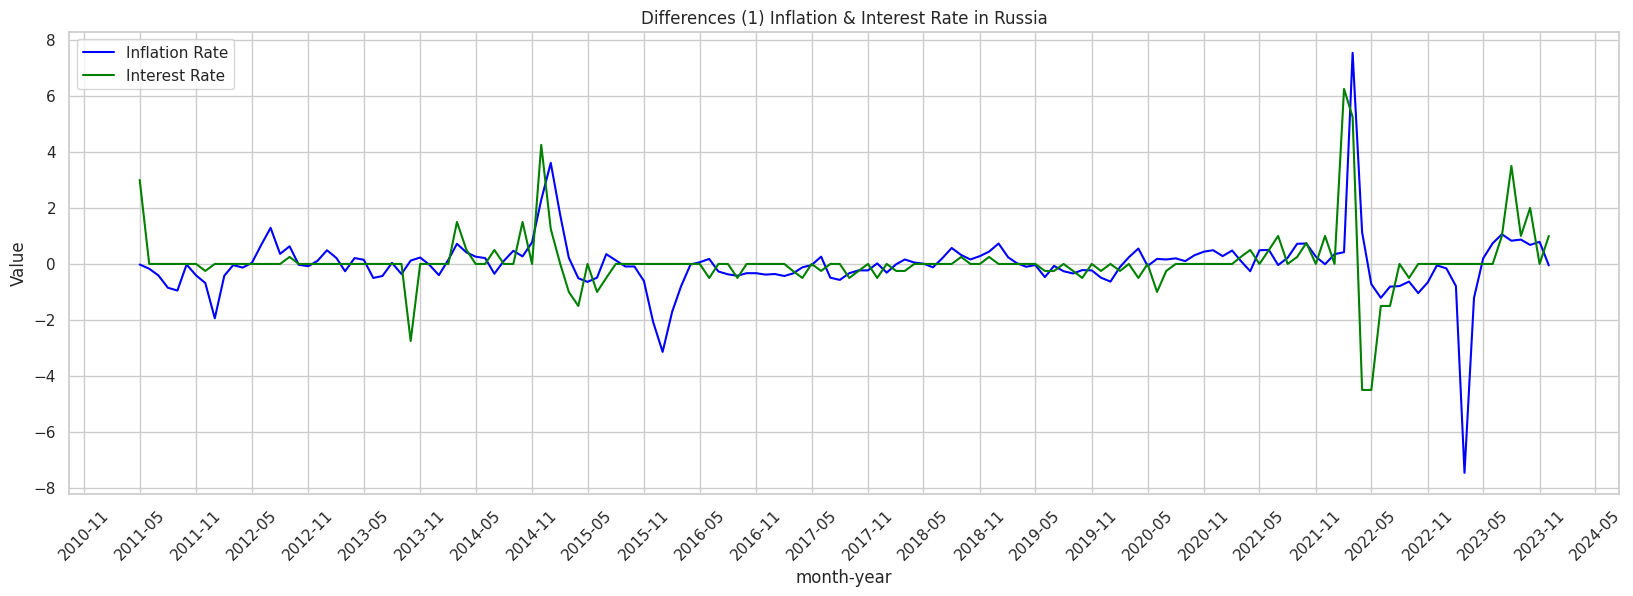

In [30]:
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(20, 6))

data = df_stationary.copy()
data['month-year'] = pd.to_datetime(data['month-year'])
data['target_inflation'] = 4

# Plot the primary y-axis data
sns.lineplot(data=data, x="month-year", y="inflaton_rate", ax=ax1, color="blue", label = 'Inflation Rate')

# Create the secondary y-axis
sns.lineplot(data=data, x="month-year", y="interest_rate", ax=ax1, color="green", label = 'Interest Rate')

ax1.set_title('Differences (1) Inflation & Interest Rate in Russia')
ax1.set_ylabel('Value')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show every 2nd month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.legend(loc= "upper left")
# Show the plot
plt.show()

### Lags

In [31]:
def add_lags(df, lag_size, features):
    for f in features:
        df[f'{f}_lag_{lag_size}'] = df[f].shift(lag_size)
    return df[1:]

In [32]:
# macro_economic_features = list(me_df.columns)[1:]
# proc_df = add_lags(df = df_stationary, lag_size=1, features=macro_economic_features)

features = list(df_stationary.columns)[1:]
proc_df = add_lags(df = df_stationary, lag_size=1, features=features)

print(f'Data size: {proc_df.shape[0]}x{proc_df.shape[1]}')
proc_df.head()

Data size: 151x97


,month-year,inflaton_rate,interest_rate,CPI,unemplyment_rate,GDP,fx_eur_rub,fx_usd_rub,oil_price,gas_price,gold_price,exports,imports,external_debt,chicken_eggs_10pcs,granulated_sugar_1kg,wheat_flour_1kg,avg_monthly_salary,sanctions,topic_0,topic_1,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_2,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,inflaton_rate_lag_1,interest_rate_lag_1,CPI_lag_1,unemplyment_rate_lag_1,GDP_lag_1,fx_eur_rub_lag_1,fx_usd_rub_lag_1,oil_price_lag_1,gas_price_lag_1,gold_price_lag_1,exports_lag_1,imports_lag_1,external_debt_lag_1,chicken_eggs_10pcs_lag_1,granulated_sugar_1kg_lag_1,wheat_flour_1kg_lag_1,avg_monthly_salary_lag_1,sanctions_lag_1,topic_0_lag_1,topic_1_lag_1,topic_10_lag_1,topic_11_lag_1,topic_12_lag_1,topic_13_lag_1,topic_14_lag_1,topic_15_lag_1,topic_16_lag_1,topic_17_lag_1,topic_18_lag_1,topic_19_lag_1,topic_2_lag_1,topic_20_lag_1,topic_21_lag_1,topic_22_lag_1,topic_23_lag_1,topic_24_lag_1,topic_25_lag_1,topic_26_lag_1,topic_27_lag_1,topic_28_lag_1,topic_29_lag_1,topic_3_lag_1,topic_4_lag_1,topic_5_lag_1,topic_6_lag_1,topic_7_lag_1,topic_8_lag_1,topic_9_lag_1
1,2011-06,-0.17,0.0,0.2,-0.8,1410.022767,0.294486,0.072509,-5.068030,0.179903,16.981168,-183.4091,-612.7362,29759.0,-4.40,-0.99,-0.23,1358.0,0.0,0.010965,0.020755,0.042945,-0.024100,-0.000870,0.003960,-0.005177,-0.008439,0.000393,0.003873,-0.010572,0.003308,0.001046,-0.025016,-0.036764,0.007963,-0.000652,0.004178,0.020450,-0.004525,0.013010,0.013621,-0.009179,-0.011608,0.003003,0.045036,0.000611,0.004090,0.005048,0.007310,-0.02,3.0,0.6,0.2,0.000000,-0.492550,-0.211921,-8.681834,0.064493,29.149286,-1509.6119,999.5400,0.0,-6.87,-1.62,-0.19,260.0,0.0,-0.015291,-0.008705,0.027149,0.046140,-0.005383,-0.002118,-0.005183,-0.041349,0.019905,0.002262,-0.028721,0.017041,0.008994,0.000089,0.009740,0.002262,0.004725,-0.010566,0.040724,0.000401,-0.009106,-0.012082,0.008994,0.020315,-0.003121,-0.004693,-0.013285,0.006787,0.005127,-0.015692
2,2011-07,-0.41,0.0,0.0,-0.3,0.000000,-0.367301,-0.082742,1.051863,-0.162795,49.129550,-2030.2035,-298.6864,-29759.0,0.34,0.65,-0.07,-539.0,0.0,-0.003413,-0.010686,0.042254,-0.009634,0.017642,0.015669,-0.001440,0.038308,0.001051,-0.003788,0.032633,-0.011593,-0.011593,-0.003716,0.018016,-0.007878,0.003255,0.008324,0.014085,0.007042,-0.017195,-0.025836,0.003327,-0.008828,-0.004925,-0.014488,-0.001599,0.007042,-0.011665,0.007114,-0.17,0.0,0.2,-0.8,1410.022767,0.294486,0.072509,-5.068030,0.179903,16.981168,-183.4091,-612.7362,29759.0,-4.40,-0.99,-0.23,1358.0,0.0,0.010965,0.020755,0.042945,-0.024100,-0.000870,0.003960,-0.005177,-0.008439,0.000393,0.003873,-0.010572,0.003308,0.001046,-0.025016,-0.036764,0.007963,-0.000652,0.004178,0.020450,-0.004525,0.013010,0.013621,-0.009179,-0.011608,0.003003,0.045036,0.000611,0.004090,0.005048,0.007310
3,2011-08,-0.85,0.0,-0.3,0.4,0.000000,1.164849,0.860332,-10.999630,-0.369685,181.366300,2634.6997,2707.3087,0.0,2.97,-0.64,-0.12,-547.0,0.0,0.004574,-0.016487,0.025701,0.111831,-0.002457,-0.011880,0.004651,-0.049416,0.002150,0.004662,-0.009565,0.004574,0.006911,0.034959,-0.018900,-0.000011,-0.007053,0.004519,0.023364,-0.004706,0.006965,-0.014194,-0.018812,-0.052268,-0.007053,0.013580,-0.002501,0.021028,0.011660,-0.002446,-0.41,0.0,0.0,-0.3,0.000000,-0.367301,-0.082742,1.051863,-0.162795,49.129550,-2030.2035,-298.6864,-29759.0,0.34,0.65,-0.07,-539.0,0.0,-0.003413,-0.010686,0.042254,-0.009634,0.017642,0.015669,-0.001440,0.038308,0.001051,-0.003788,0.032633,-0.011593,-0.011593,-0.003716,0.018016,-0.007878,0.003255,0.008324,0.014085,0.007042,-0.017195,-0.025836,0.003327,-0.008828,-0.004925,-0.014488,-0.001599,0.007042,-0.011665,0.007114
4,2011-09,-0.95,0.0,0.0,-0.4,1310.761261,1.195111,1.861869,-0.730871,-0.134518,3.694409,-781.6325,-2594.2622,-12542.0,3.12,-3.83,-0.41,417.0,0.0,-0.009828,-0.002612,0.058957,-0.073331,-0.009759,-0.000895,-0.00

In [44]:
proc_df.to_csv('data/df_processed.csv', index=False)

###  Features's plots after differencing

In [46]:
# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Inflation Rate', 'Interest Rate', 'Unemplyment Rate', 'External Debt', 'CPI (Consumer Price Index)', 
                    'GDP (Gross Domestic Product)')
)


chart1 = go.Scatter(x=proc_df['month-year'], y=proc_df['inflaton_rate'], mode='lines', name='Inflation Rate')
fig.add_trace(chart1, row=1, col=1)  # Add to first subplot (1st row, 1st column)

chart2 = go.Scatter(x=proc_df['month-year'], y=proc_df['interest_rate'], mode='lines', name='Interest Rate')
fig.add_trace(chart2, row=1, col=2)

chart3 = go.Scatter(x=proc_df['month-year'], y=proc_df['unemplyment_rate'], mode='lines', name='Unemplyment Rate')
fig.add_trace(chart3, row=1, col=3)

#chart4 = go.Scatter(x=proc_df['month-year'], y=proc_df['MOEX'], mode='lines', name='MOEX')
#fig.add_trace(chart4, row=2, col=1)  # Add to first subplot (1st row, 1st column)

chart4 = go.Scatter(x=proc_df['month-year'], y=proc_df['external_debt'], mode='lines', name='External Debt')
fig.add_trace(chart4, row=2, col=1)  # Add to first subplot (1st row, 1st column)

chart5 = go.Scatter(x=proc_df['month-year'], y=proc_df['CPI'], mode='lines', name='CPI')
fig.add_trace(chart5, row=2, col=2)  # Add to second subplot (1st row, 2nd column)

chart6 = go.Scatter(x=proc_df['month-year'], y=proc_df['GDP'], mode='lines', name='GDP')
fig.add_trace(chart6, row=2, col=3)



# Update layout for better display
fig.update_layout(  
    
    #xaxis_title='month-year',              # X-axis title for all subplots
    #yaxis_title='Value',             # Y-axis title for all subplots
    showlegend=True, 
    height=600, 
    width=1000,
    xaxis=dict(
        tickformat="%Y",    # Format the date to Year-Month (e.g., 2020-01)
        dtick="M12"             # Set the granularity to monthly ticks
    ),
    xaxis2=dict(
        tickformat="%Y",   
        dtick="M12"            
    ),
    xaxis3=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis4=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis5=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis6=dict(
        tickformat="%Y",    
        dtick="M12"             
    )
)

# Show the plot
fig.show()


In [48]:
# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Average monthly salary', 'Exports', 'Imports', 'Chicken eggs, 10 pcs.', 'Granulated sugar, kg', 
                    'Wheat flour, kg')
)


chart1 = go.Scatter(x=proc_df['month-year'], y=proc_df['avg_monthly_salary'], mode='lines', name='Average monthly salary')
fig.add_trace(chart1, row=1, col=1)  # Add to first subplot (1st row, 1st column)

chart2 = go.Scatter(x=proc_df['month-year'], y=proc_df['exports'], mode='lines', name='Exports')
fig.add_trace(chart2, row=1, col=2)

chart3 = go.Scatter(x=proc_df['month-year'], y=proc_df['imports'], mode='lines', name='Imports')
fig.add_trace(chart3, row=1, col=3)

chart4 = go.Scatter(x=proc_df['month-year'], y=proc_df['chicken_eggs_10pcs'], mode='lines', name='Chicken eggs, 10 pcs.')
fig.add_trace(chart4, row=2, col=1)  # Add to first subplot (1st row, 1st column)

chart5 = go.Scatter(x=proc_df['month-year'], y=proc_df['granulated_sugar_1kg'], mode='lines', name='Granulated sugar, kg')
fig.add_trace(chart5, row=2, col=2)  # Add to second subplot (1st row, 2nd column)

chart6 = go.Scatter(x=proc_df['month-year'], y=proc_df['wheat_flour_1kg'], mode='lines', name='Wheat flour, kg')
fig.add_trace(chart6, row=2, col=3)



# Update layout for better display
fig.update_layout(  
    
    #xaxis_title='Date',              # X-axis title for all subplots
    #yaxis_title='Value',             # Y-axis title for all subplots
    showlegend=True, 
    height=600, 
    width=1000,
    xaxis=dict(
        tickformat="%Y",    # Format the date to Year-Month (e.g., 2020-01)
        dtick="M12"             # Set the granularity to monthly ticks
    ),
    xaxis2=dict(
        tickformat="%Y",   
        dtick="M12"            
    ),
    xaxis3=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis4=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis5=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis6=dict(
        tickformat="%Y",    
        dtick="M12"             
    )
)

# Show the plot
fig.show()


In [49]:
# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('EUR to RUB', 'USD to RUB', 'Oil Price', 'Gas Price', 
                    'Gold Price')
)

chart1 = go.Scatter(x=proc_df['month-year'], y=proc_df['fx_eur_rub'], mode='lines', name='EUR to RUB')
fig.add_trace(chart1, row=1, col=1)

chart2 = go.Scatter(x=proc_df['month-year'], y=proc_df['fx_usd_rub'], mode='lines', name='USD to RUB')
fig.add_trace(chart2, row=1, col=2)

chart3 = go.Scatter(x=proc_df['month-year'], y=proc_df['oil_price'], mode='lines', name='Oil Price')
fig.add_trace(chart3, row=1, col=3)  # Add to first subplot (1st row, 1st column)

chart4 = go.Scatter(x=proc_df['month-year'], y=proc_df['gas_price'], mode='lines', name='Gas Price')
fig.add_trace(chart4, row=2, col=1)  # Add to second subplot (1st row, 2nd column)

chart5 = go.Scatter(x=proc_df['month-year'], y=proc_df['gold_price'], mode='lines', name='Gold Price')
fig.add_trace(chart5, row=2, col=2)



# Update layout for better display
fig.update_layout(  
    
    #xaxis_title='Date',              # X-axis title for all subplots
    #yaxis_title='Value',             # Y-axis title for all subplots
    showlegend=True, 
    height=600, 
    width=1000,
    xaxis=dict(
        tickformat="%Y",    # Format the date to Year-Month (e.g., 2020-01)
        dtick="M12"             # Set the granularity to monthly ticks
    ),
    xaxis2=dict(
        tickformat="%Y",   
        dtick="M12"            
    ),
    xaxis3=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis4=dict(
        tickformat="%Y",    
        dtick="M12"             
    ),
    xaxis5=dict(
        tickformat="%Y",    
        dtick="M12"             
    )
)

# Show the plot
fig.show()
